In [44]:
# Ultra Marathon Data Analysis Project
# Author: [Sasha Sutton]
# Description: Analysis of ultra marathon races across the world, focusing on 50km and 50mi races in the USA during 2020.

In [3]:
# Import libraries
import pandas as pd
import seaborn as sns

In [5]:
# Load the data
df = pd.read_csv("../Data/TWO_CENTURIES_OF_UM_RACES.csv")

/var/folders/x1/zc4vqm8s1753b8mc55xkgw480000gn/T/ipykernel_59942/2970646408.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("TWO_CENTURIES_OF_UM_RACES.csv")


In [46]:
# Initial exploration
print("First 10 rows of the dataset:")
print(df.head(10))
print("\nDataset shape (rows, columns):", df.shape)
print("\nData types of each column:")
print(df.dtypes)

First 10 rows of the dataset:
   Year of event Event dates           Event name Event distance/length  \
0           2018  06.01.2018  Selva Costera (CHI)                  50km   
1           2018  06.01.2018  Selva Costera (CHI)                  50km   
2           2018  06.01.2018  Selva Costera (CHI)                  50km   
3           2018  06.01.2018  Selva Costera (CHI)                  50km   
4           2018  06.01.2018  Selva Costera (CHI)                  50km   
5           2018  06.01.2018  Selva Costera (CHI)                  50km   
6           2018  06.01.2018  Selva Costera (CHI)                  50km   
7           2018  06.01.2018  Selva Costera (CHI)                  50km   
8           2018  06.01.2018  Selva Costera (CHI)                  50km   
9           2018  06.01.2018  Selva Costera (CHI)                  50km   

   Event number of finishers Athlete performance         Athlete club  \
0                         22           4:51:39 h                Tnfrc  

In [9]:
# ---- DATA CLEANING ----

# Filter for 50km or 50mi races in 2020, held in the USA
filtered_df = df[(df['Event distance/length'].isin(['50km', '50mi'])) & 
                 (df['Year of event'] == 2020) & 
                 (df['Event name'].str.split('(').str.get(1).str.split(')').str.get(0) == 'USA')]


In [11]:
# Simplify event names by removing '(USA)'
filtered_df['Event name'] = filtered_df['Event name'].str.split('(').str.get(0)

/var/folders/x1/zc4vqm8s1753b8mc55xkgw480000gn/T/ipykernel_59942/502559676.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Event name'] = filtered_df['Event name'].str.split('(').str.get(0)


In [13]:
# Calculate athlete age
filtered_df['athlete_age'] = 2020 - filtered_df['Athlete year of birth']

/var/folders/x1/zc4vqm8s1753b8mc55xkgw480000gn/T/ipykernel_59942/2076896498.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['athlete_age'] = 2020 - filtered_df['Athlete year of birth']


In [15]:
# Clean up athlete performance data (remove 'h')
filtered_df['Athlete performance'] = filtered_df['Athlete performance'].str.split(' ').str.get(0)

/var/folders/x1/zc4vqm8s1753b8mc55xkgw480000gn/T/ipykernel_59942/1771500202.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Athlete performance'] = filtered_df['Athlete performance'].str.split(' ').str.get(0)


In [17]:
# Drop irrelevant columns
filtered_df = filtered_df.drop(['Athlete club', 'Athlete country', 'Athlete year of birth', 'Athlete age category'], axis=1)

In [20]:
# Remove rows with missing values
filtered_df = filtered_df.dropna()

In [22]:
# Remove duplicates and reset the index
filtered_df = filtered_df[~filtered_df.duplicated()]
filtered_df.reset_index(drop=True, inplace=True)

In [24]:
# Fix data types
filtered_df['athlete_age'] = filtered_df['athlete_age'].astype(int)
filtered_df['Athlete average speed'] = filtered_df['Athlete average speed'].astype(float)

In [26]:
# Rename columns for better readability
filtered_df = filtered_df.rename(columns={
    'Year of event': 'year',
    'Event dates': 'race_day',
    'Event name': 'race_name',
    'Event distance/length': 'race_length', 
    'Event number of finishers': 'race_number_of_finishers',
    'Athlete performance': 'athlete_performance',
    'Athlete gender': 'athlete_gender',
    'Athlete average speed': 'athlete_average_speed',
    'Athlete ID': 'athlete_id'
})

In [28]:
# Reorder columns for better readability
cleaned_df = filtered_df[['race_day', 'race_name', 'race_length', 'race_number_of_finishers',
                          'athlete_id', 'athlete_gender', 'athlete_age', 
                          'athlete_performance', 'athlete_average_speed']]

print("\nCleaned dataset preview:")
print(cleaned_df.head())


Cleaned dataset preview:
     race_day                                 race_name race_length  \
0  02.02.2020  West Seattle Beach Run - Winter Edition         50km   
1  02.02.2020  West Seattle Beach Run - Winter Edition         50km   
2  02.02.2020  West Seattle Beach Run - Winter Edition         50km   
3  02.02.2020  West Seattle Beach Run - Winter Edition         50km   
4  02.02.2020  West Seattle Beach Run - Winter Edition         50km   

   race_number_of_finishers  athlete_id athlete_gender  athlete_age  \
0                        20       71287              M           29   
1                        20      629508              M           39   
2                        20       64838              M           21   
3                        20      704450              M           37   
4                        20      810281              M           43   

  athlete_performance  athlete_average_speed  
0             3:17:55                 15.158  
1             4:02:32     

In [30]:
# ---- DATA ANALYSIS ----

# Example: Specific athlete analysis
print("\nDetails of a specific race (Everglades 50 Mile Ultra Run):")
print(cleaned_df[cleaned_df['race_name'] == 'Everglades 50 Mile Ultra Run'])

print("\nDetails of a specific athlete (ID 222509):")
print(cleaned_df[cleaned_df['athlete_id'] == 222509])


Details of a specific race (Everglades 50 Mile Ultra Run):
Empty DataFrame
Columns: [race_day, race_name, race_length, race_number_of_finishers, athlete_id, athlete_gender, athlete_age, athlete_performance, athlete_average_speed]
Index: []

Details of a specific athlete (ID 222509):
         race_day                      race_name race_length  \
7087   14.03.2020  Everglades 50 Mile Ultra Run         50mi   
11054  22.02.2020       Manasota Track Club 50K         50km   

       race_number_of_finishers  athlete_id athlete_gender  athlete_age  \
7087                         40      222509              M           23   
11054                        36      222509              M           23   

      athlete_performance  athlete_average_speed  
7087              9:19:10                  8.634  
11054             4:49:16                 10.371  


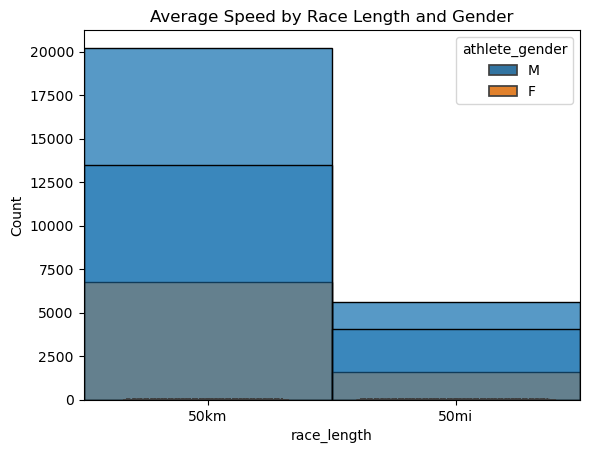

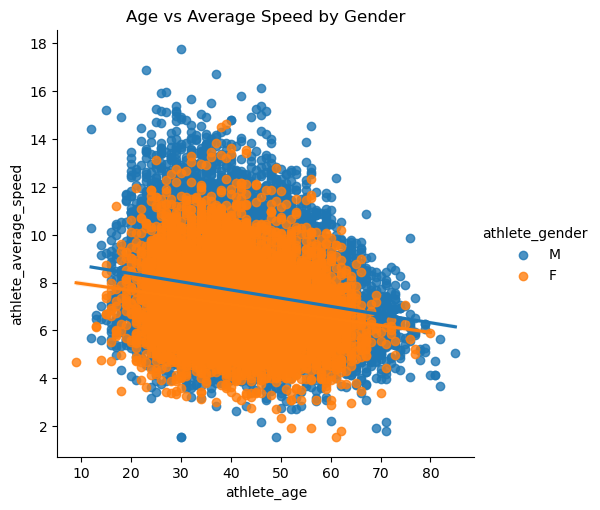

In [32]:
# ---- VISUALISATIONS ----

# Distribution of race lengths
sns.histplot(cleaned_df['race_length']).set(title='Distribution of Race Lengths')

# Race length by gender
sns.histplot(data=cleaned_df, x='race_length', hue='athlete_gender').set(title='Race Length Distribution by Gender')

# Speed vs age with violin plot
sns.violinplot(data=cleaned_df, x='race_length', y='athlete_average_speed', 
               hue='athlete_gender', split=True, inner='quart').set(title='Average Speed by Race Length and Gender')

# Linear regression: Age vs speed
sns.lmplot(data=cleaned_df, x='athlete_age', y='athlete_average_speed', 
           hue='athlete_gender').set(title='Age vs Average Speed by Gender')


In [34]:
# ---- INSIGHTS ----


In [36]:
# 1. Difference in average speed between genders for 50km and 50mi
speed_diff = cleaned_df.groupby(['race_length', 'athlete_gender'])['athlete_average_speed'].mean()
print("\nDifference in average speed by gender and race length:")
print(speed_diff)


Difference in average speed by gender and race length:
race_length  athlete_gender
50km         F                 7.083011
             M                 7.738985
50mi         F                 6.834371
             M                 7.257633
Name: athlete_average_speed, dtype: float64


In [38]:
# 2. Best performing age groups for 50mi (minimum 20 races)
best_ages_50mi = cleaned_df.query('race_length == "50mi"') \
    .groupby('athlete_age')['athlete_average_speed'].agg(['mean', 'count']) \
    .sort_values('mean', ascending=False).query('count > 19')
print("\nBest performing age groups in 50mi races:")
print(best_ages_50mi.head())


Best performing age groups in 50mi races:
                 mean  count
athlete_age                 
29           7.902252    135
23           7.779800     55
28           7.575252    107
30           7.569204    157
25           7.540923     91


In [40]:
# 3. Worst performing age groups for 50mi (minimum 20 races)
worst_ages_50mi = cleaned_df.query('race_length == "50mi"') \
    .groupby('athlete_age')['athlete_average_speed'].agg(['mean', 'count']) \
    .sort_values('mean', ascending=True).query('count > 19')
print("\nWorst performing age groups in 50mi races:")
print(worst_ages_50mi.head())


Worst performing age groups in 50mi races:
                 mean  count
athlete_age                 
60           6.261788     33
62           6.272730     37
61           6.358355     31
63           6.514806     31
58           6.582328     67


In [42]:
# 4. Average speed by season
# Define seasons based on race month
cleaned_df['race_month'] = cleaned_df['race_day'].str.split('.').str.get(1).astype(int)
cleaned_df['race_season'] = cleaned_df['race_month'].apply(
    lambda x: 'Winter' if x > 11 or x < 3 else 'Spring' if x < 6 else 'Summer' if x < 9 else 'Fall')

season_speed = cleaned_df.groupby('race_season')['athlete_average_speed'].agg(['mean', 'count']).sort_values('mean', ascending=False)
print("\nAverage speed by season:")
print(season_speed)



Average speed by season:
                 mean  count
race_season                 
Spring       7.684430   3294
Winter       7.518187  11595
Fall         7.406619   8315
Summer       6.869336   2653
